In [19]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<h1>Data Import & Overview</h1>

In [6]:
#Loading the dataset
cancer = pd.read_csv('cancer.csv')

#Print the first 5 rows of the dataframe.
cancer.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


In [7]:
cancer.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


In [8]:
cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1500.0,50.320000,17.640968,20.000000,35.000000,51.000000,66.000000,80.000000
Gender,1500.0,0.490667,0.500080,0.000000,0.000000,0.000000,1.000000,1.000000
BMI,1500.0,27.513321,7.230012,15.000291,21.483134,27.598494,33.850837,39.958688
Smoking,1500.0,0.269333,0.443761,0.000000,0.000000,0.000000,1.000000,1.000000
GeneticRisk,1500.0,0.508667,0.678895,0.000000,0.000000,0.000000,1.000000,2.000000
PhysicalActivity,1500.0,4.897929,2.866162,0.002410,2.434609,4.834316,7.409896,9.994607
AlcoholIntake,1500.0,2.417987,1.419318,0.001215,1.210598,2.382971,3.585624,4.987115
CancerHistory,1500.0,0.144000,0.351207,0.000000,0.000000,0.000000,0.000000,1.000000
Diagnosis,1500.0,0.371333,0.483322,0.000000,0.000000,0.000000,1.000000,1.000000


In [9]:
cancer.shape

(1500, 9)

In [10]:
cancer.isnull().sum()

Age                 0
Gender              0
BMI                 0
Smoking             0
GeneticRisk         0
PhysicalActivity    0
AlcoholIntake       0
CancerHistory       0
Diagnosis           0
dtype: int64

In [11]:
cancer.duplicated().sum()

0

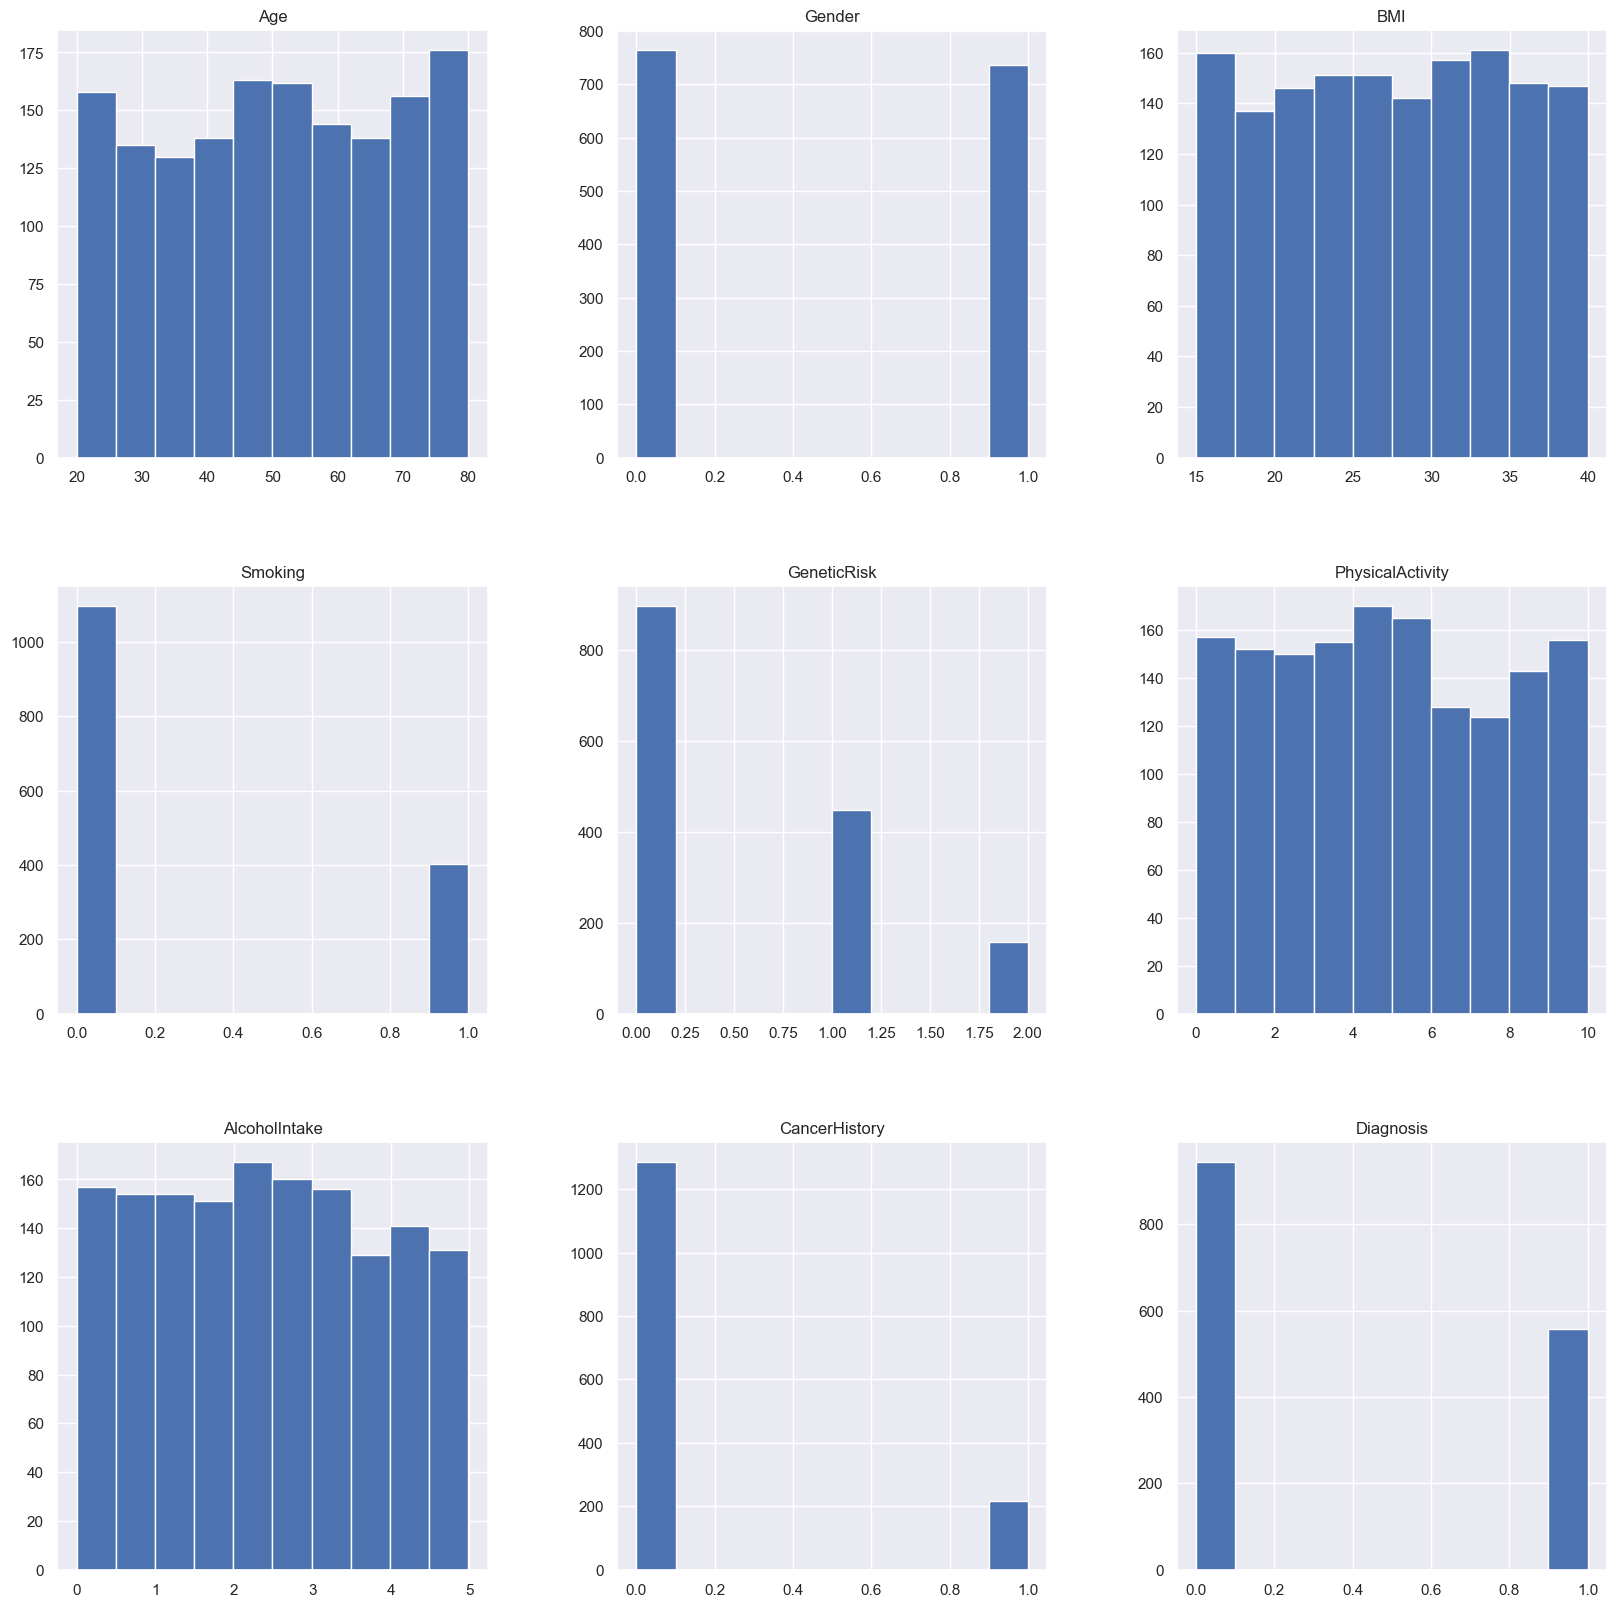

In [12]:
p = cancer.hist(figsize = (20,20))

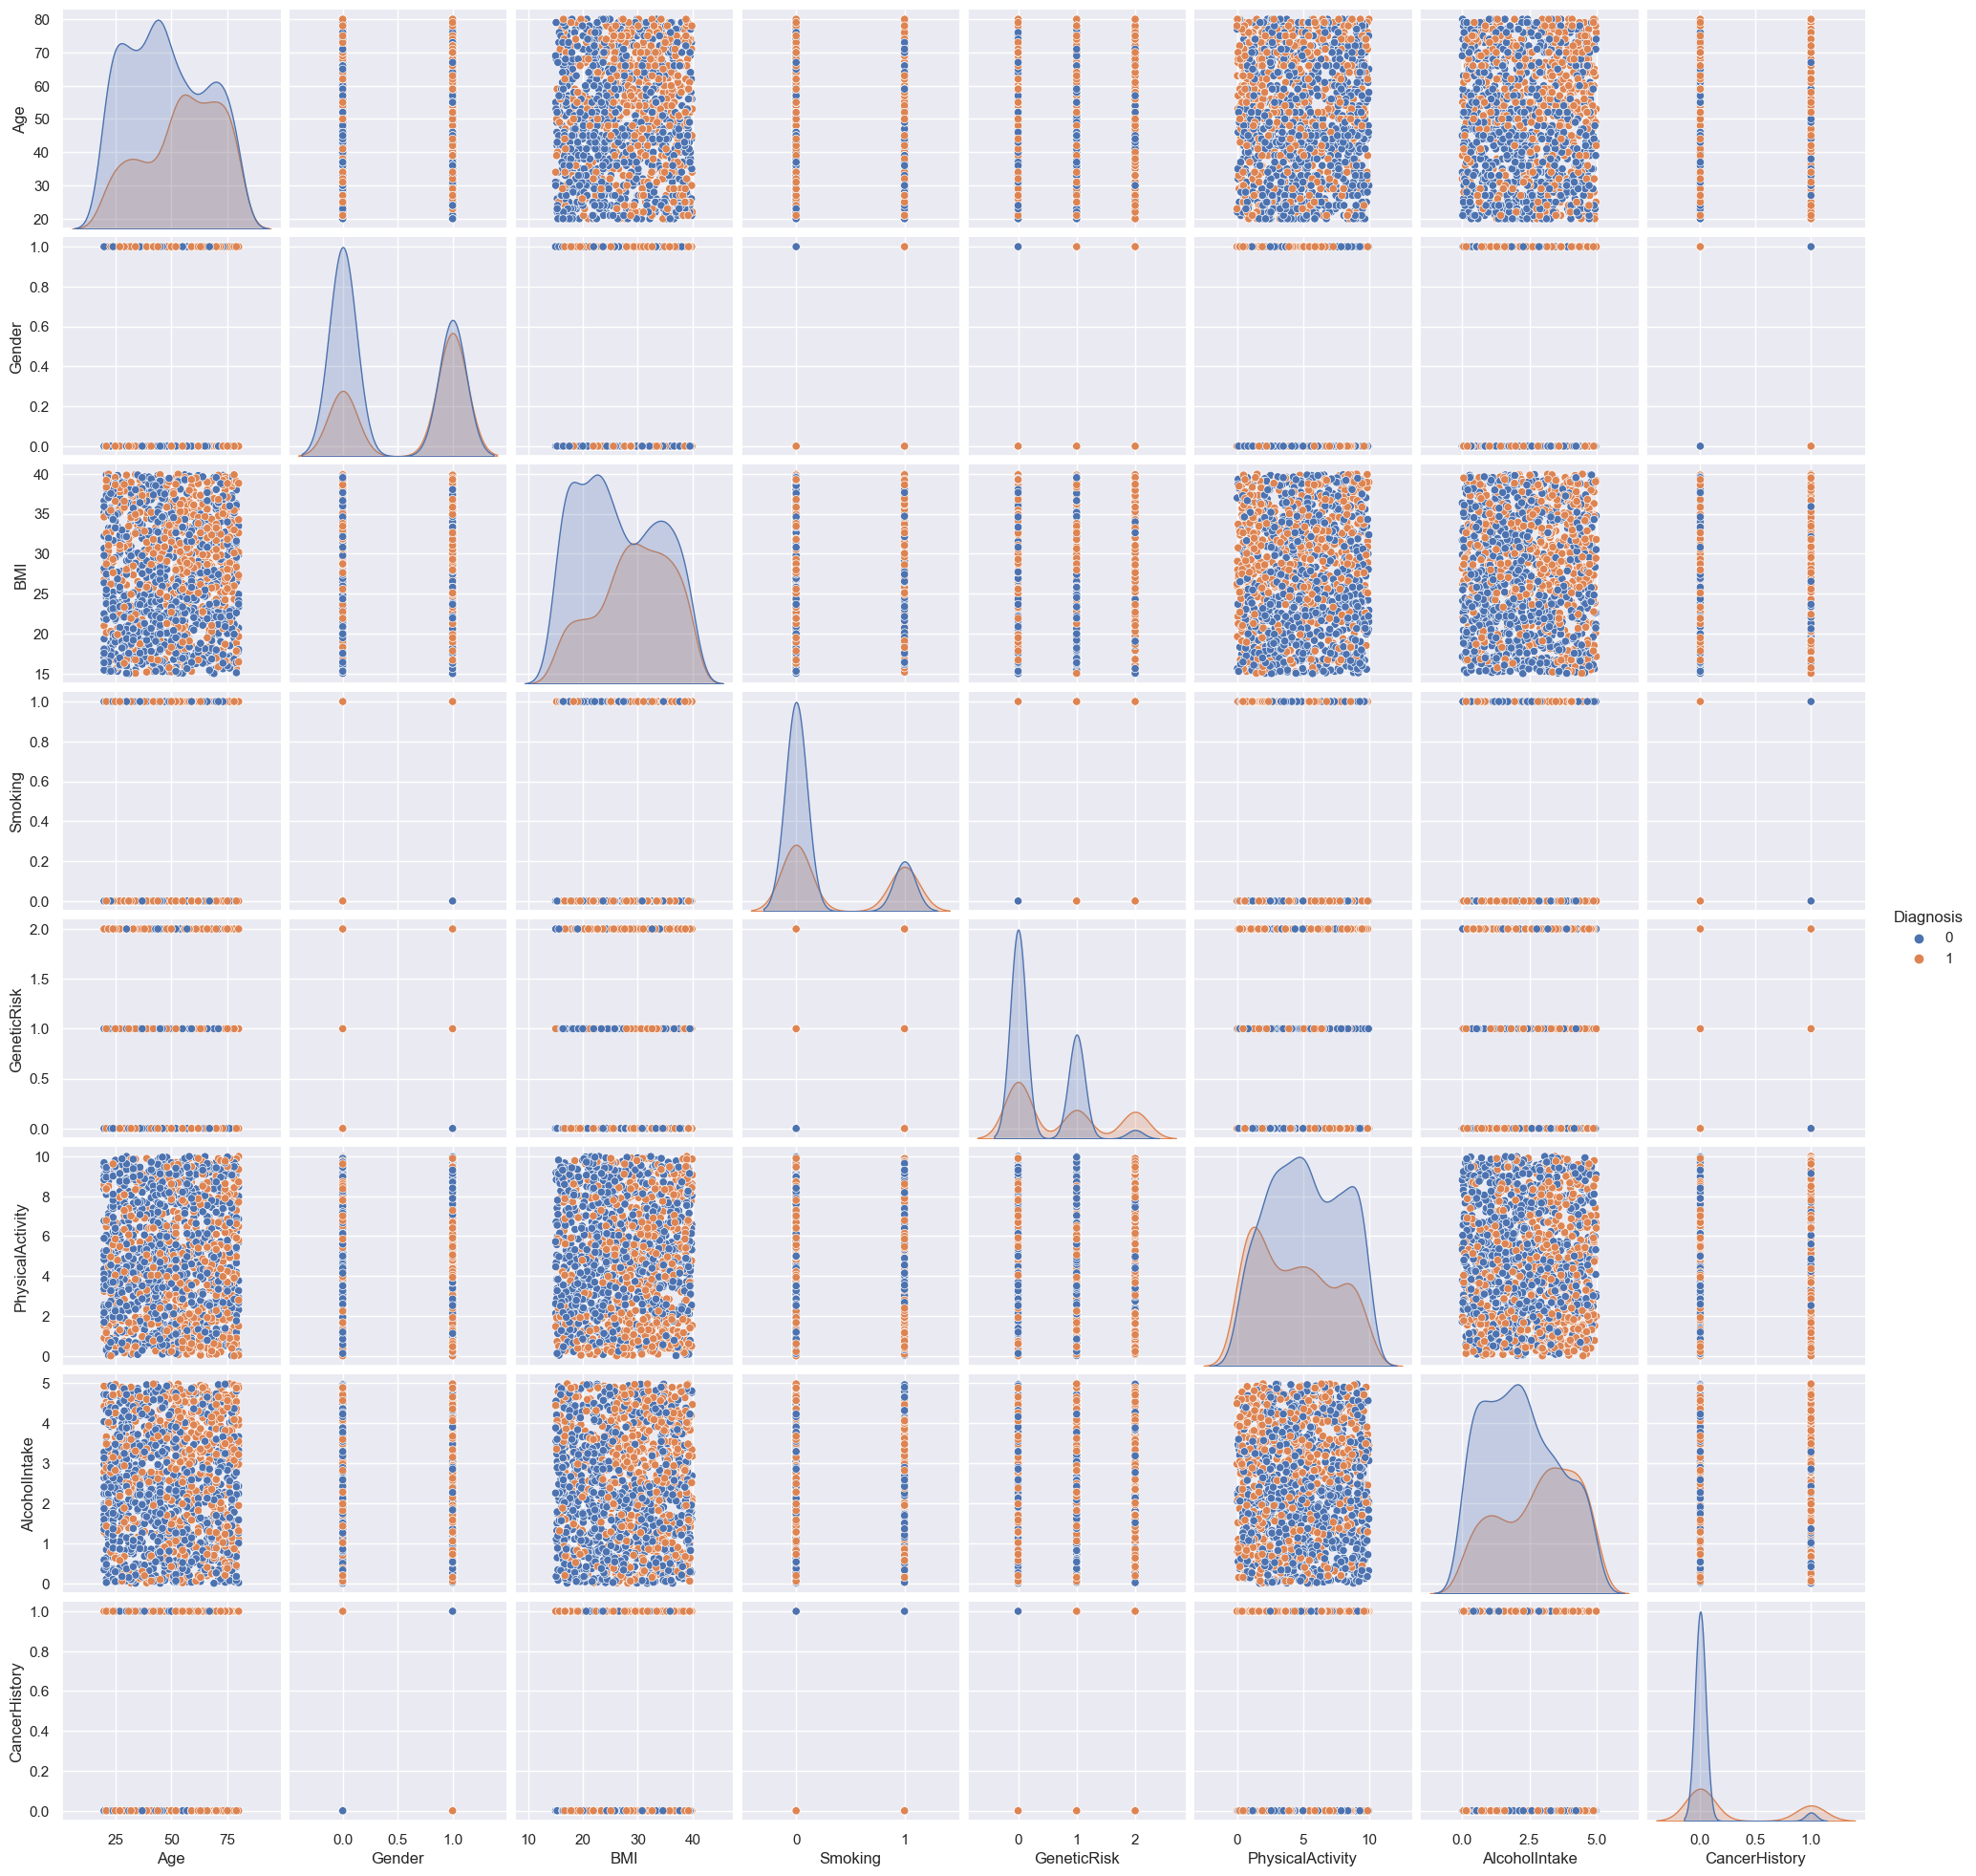

In [14]:
pplot=sns.pairplot(cancer, hue = 'Diagnosis') 

In [23]:
c

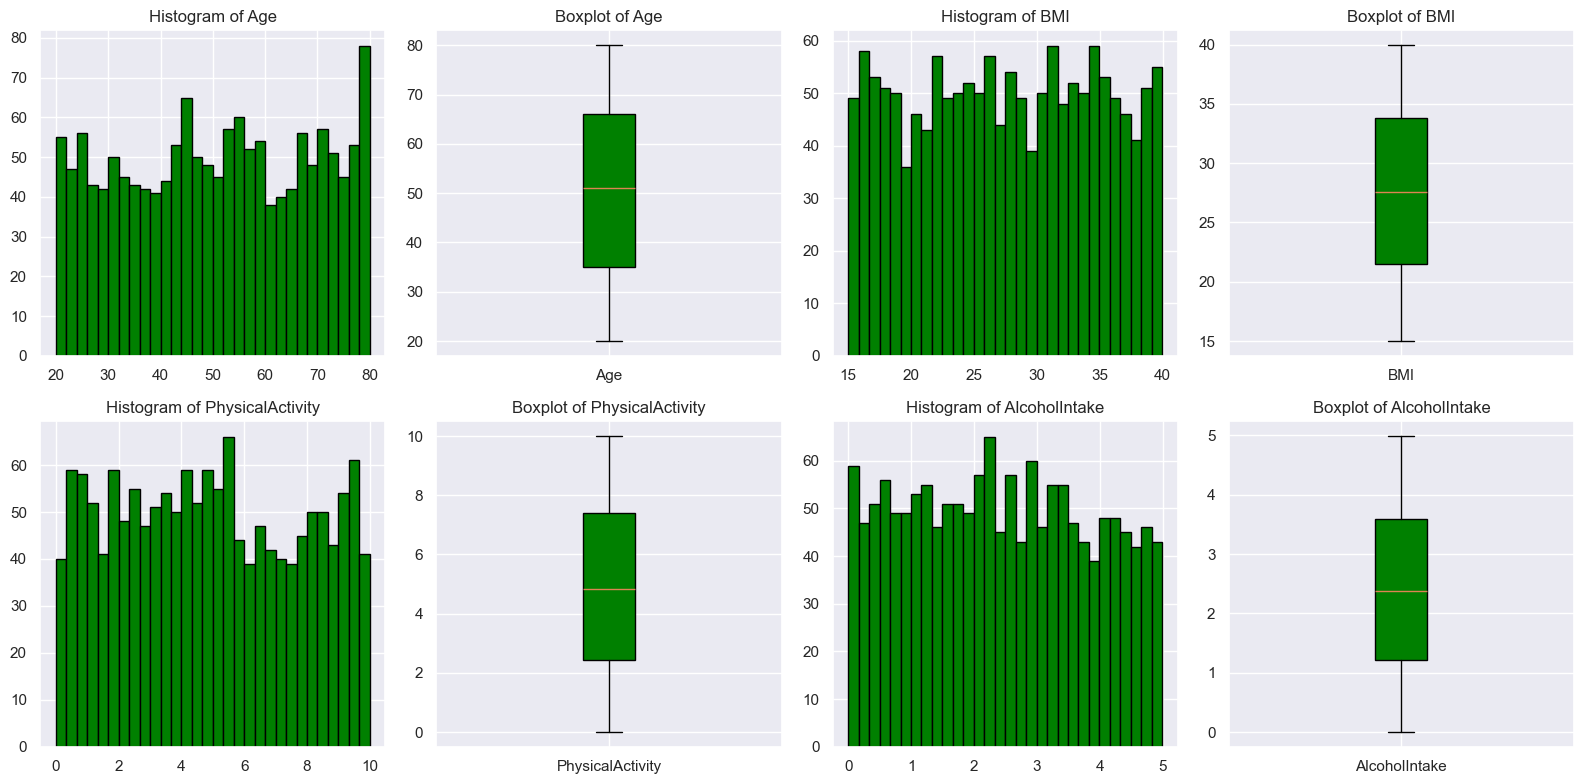

In [35]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i, feature in enumerate(continuous_features):
    # Histogram
    ax_hist = axes[i // 2, (i % 2) * 2]
    ax_hist.hist(cancer[feature].dropna(), bins=30, color='green', edgecolor='black')
    ax_hist.set_title(f'Histogram of {feature}')
    
    # Boxplot
    ax_box = axes[i // 2, (i % 2) * 2 + 1]
    ax_box.boxplot(cancer[feature].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor='green'))
    ax_box.set_title(f'Boxplot of {feature}')
    ax_box.set_xticks([1])
    ax_box.set_xticklabels([feature])

plt.tight_layout()
plt.show()

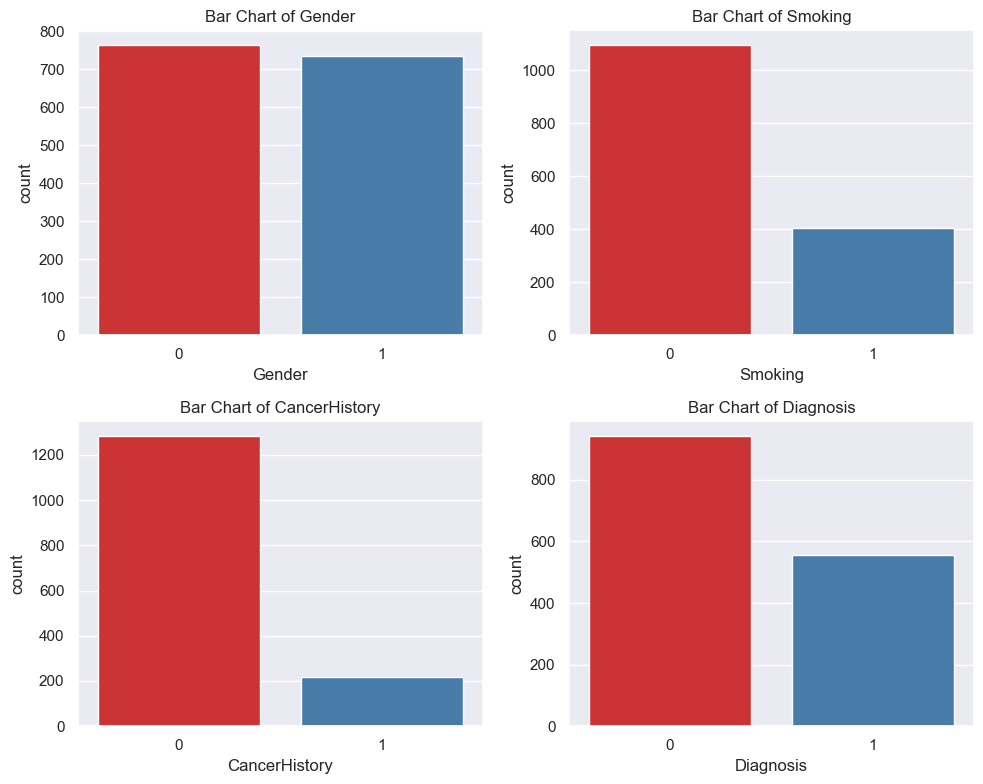

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
for i, feature in enumerate(binary_features):
    sns.countplot(data=cancer, x=feature, ax=axes[i // 2, i % 2], palette='Set1')
    axes[i // 2, i % 2].set_title(f'Bar Chart of {feature}')
plt.tight_layout()
plt.show()

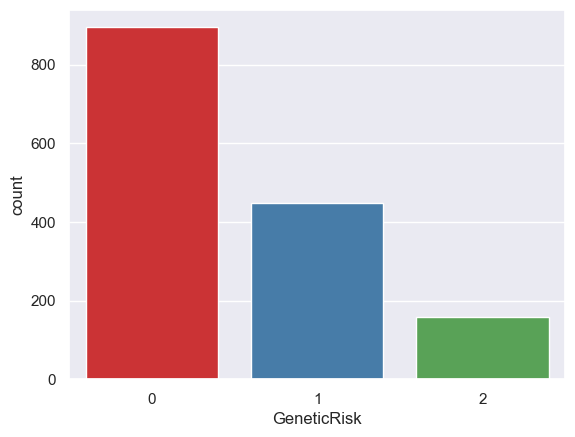

In [32]:
sns.countplot(data=cancer, x='GeneticRisk', palette='Set1')
plt.show()

Diagnosis
0    943
1    557
Name: count, dtype: int64


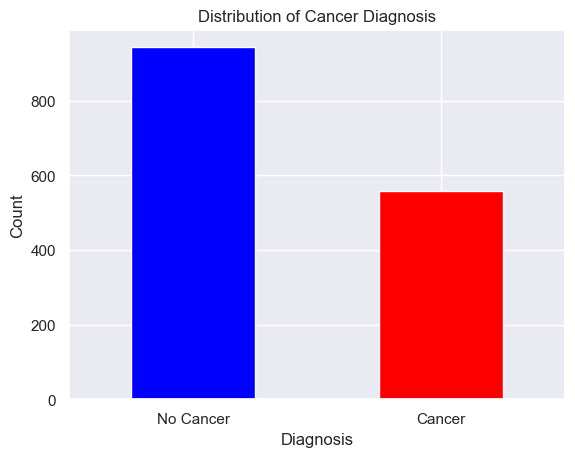

In [37]:
## checking the balance of the data by plotting the count of outcomes by their value
labels = ["No Cancer", "Cancer"]
print(cancer.Diagnosis.value_counts())
px=cancer.Diagnosis.value_counts().plot(kind="bar", color=['blue', 'red'])

# Rename x-axis labels
px.set_xticklabels(labels, rotation=0)  

# Add labels
px.set_xlabel("Diagnosis")
px.set_ylabel("Count")
px.set_title("Distribution of Cancer Diagnosis")

plt.show()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
Age,1.000000,0.007145,0.030246,-0.013914,-0.027025,0.016396,0.003209,-0.010996,0.196603
Gender,0.007145,1.000000,-0.012516,0.035384,-0.004674,0.023401,0.009723,0.007657,0.250336
BMI,0.030246,-0.012516,1.000000,-0.012616,0.011392,0.011480,0.004711,-0.010824,0.187560
Smoking,-0.013914,0.035384,-0.012616,1.000000,-0.021039,-0.043817,-0.001660,0.016368,0.226999
GeneticRisk,-0.027025,-0.004674,0.011392,-0.021039,1.000000,-0.039721,-0.016864,-0.010833,0.253472
PhysicalActivity,0.016396,0.023401,0.011480,-0.043817,-0.039721,1.000000,0.033856,0.018136,-0.150089
AlcoholIntake,0.003209,0.009723,0.004711,-0.001660,-0.016864,0.033856,1.000000,0.055403,0.212772
CancerHistory,-0.010996,0.007657,-0.010824,0.016368,-0.010833,0.018136,0.055403,1.000000,0.392188
Diagnosis,0.196603,0.250336,0.187560,0.226999,0.253472,-0.150089,0.212772,0.392188,1.000000


<h2>Scaling the Data</h2>

In [39]:
# Define the target and features
X = cancer.drop('Diagnosis', axis=1)
y = cancer['Diagnosis']

from sklearn.preprocessing import StandardScaler

# Standardize the continuous features
scaler = StandardScaler()
X[continuous_features] = scaler.fit_transform(X[continuous_features])

<h2>Picking a Model</h2>

In [41]:
from sklearn.tree import DecisionTreeClassifier
# Define models for evaluation
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'k-NN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Evaluate each model using Stratified k-Fold Cross-Validation
results = {}
k = 5
skf = StratifiedKFold(n_splits=k)

for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    results[model_name] = {
        'Accuracy': scores.mean()
    }

# Convert results to a DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

NameError: name 'RandomForestClassifier' is not defined